In [1]:
import tohu
from tohu import *
from utils import print_generated_sequence

In [2]:
print(f"Tohu version: {tohu.__version__}")

Tohu version: v0.5.0+25.g019982a.dirty


This notebook contains high-level tests for `tohu`'s "standard" generators.

## Class `Integer`

Generates random integers in the range [`lo`, `hi`].

In [3]:
g = Integer(low=100, high=200)

In [4]:
g.reset(seed=12345); print_generated_sequence(g, num=15)
g.reset(seed=9999); print_generated_sequence(g, num=15)

Generated sequence: 153, 193, 101, 138, 147, 124, 134, 172, 155, 120, 147, 115, 155, 133, 171
Generated sequence: 115, 120, 196, 109, 116, 124, 136, 124, 187, 199, 176, 174, 138, 180, 170


In [5]:
some_integers = g.generate(5, seed=99999)

In [6]:
for x in some_integers:
    print(x)

115
139
164
183
194


The default distribution is "uniform", but we can use any(?) of the distributions [supported](https://docs.scipy.org/doc/numpy/reference/routines.random.html) by numpy.

In [7]:
#g = Integer(low=100, high=200, distribution=None)

## Class `Float`

Generates random floating point numbers in the range [`lo`, `hi`].

In [8]:
g = Float(low=2.71828, high=3.14159)

In [9]:
g.reset(seed=12345); print_generated_sequence(g, num=4)
g.reset(seed=9999); print_generated_sequence(g, num=4)

Generated sequence: 2.8946393582471686, 2.7225847111228716, 3.0675981674322017, 2.8446972371045396
Generated sequence: 3.0716413078479454, 2.785006097591815, 2.750284761944705, 3.0530348312992466


## Class `NumpyRandomGenerator`

Generates random numbers using one of the random number generators [supported](https://docs.scipy.org/doc/numpy/reference/routines.random.html) by numpy.

In [10]:
g1 = NumpyRandomGenerator(method="normal", loc=3.0, scale=5.0)
g2 = NumpyRandomGenerator(method="poisson", lam=30)
g3 = NumpyRandomGenerator(method="exponential", scale=0.3)

In [11]:
g1.reset(seed=12345); print_generated_sequence(g1, num=4)
g2.reset(seed=12345); print_generated_sequence(g2, num=15)
g3.reset(seed=12345); print_generated_sequence(g3, num=4)

Generated sequence: 1.9764617025764353, 5.394716690287741, 0.40280642471630923, 0.22134847826254989
Generated sequence: 40, 24, 31, 34, 27, 32, 29, 29, 35, 38, 30, 32, 38, 36, 36
Generated sequence: 0.7961371899305246, 0.11410397056571128, 0.060972430042086474, 0.06865806254932436


## Class `FakerGenerator`

It is also possible to use any generator provided by the [faker](http://faker.readthedocs.io/) library.

In [12]:
g1 = FakerGenerator(method="name")
g2 = FakerGenerator(method="name", locale='hi_IN')
g3 = FakerGenerator(method="phone_number")
g4 = FakerGenerator(method="job")

In [13]:
g1.reset(seed=12345); print_generated_sequence(g1, num=4)
g2.reset(seed=12345); print_generated_sequence(g2, num=4)
g3.reset(seed=12345); print_generated_sequence(g3, num=4)
g4.reset(seed=12345); print_generated_sequence(g4, num=4)

Generated sequence: Adam Bryan, Jacob Lee, Candice Martinez, Justin Thompson
Generated sequence: अभय महादेव, निखिल जमानत, हनुमान् गावित, अदिती बाबू
Generated sequence: (045)349-6251, 482-982-5186x98223, (355)075-0860x0292, 1-619-263-8950
Generated sequence: Gaffer, Accounting technician, Scientist, biomedical, Electronics engineer


## Class Constant

Generates a sequence repeating the same element indefinitely.

In [14]:
g = Constant("Foobar"); print_generated_sequence(g, num=10)
g = Constant(42); print_generated_sequence(g, num=20)

Generated sequence: Foobar, Foobar, Foobar, Foobar, Foobar, Foobar, Foobar, Foobar, Foobar, Foobar
Generated sequence: 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42


## Class `Sequential`

Generates a sequence of sequentially numbered strings with a given prefix.

In [15]:
g = Sequential(prefix='Foo_', digits=3)

Calling `reset()` on the generator makes the numbering start from 1 again.

In [16]:
g.reset()
print_generated_sequence(g, num=5)
print_generated_sequence(g, num=5)
print("-----------------------------")
g.reset()
print_generated_sequence(g, num=5)

Generated sequence: Foo_001, Foo_002, Foo_003, Foo_004, Foo_005
Generated sequence: Foo_006, Foo_007, Foo_008, Foo_009, Foo_010
-----------------------------
Generated sequence: Foo_001, Foo_002, Foo_003, Foo_004, Foo_005


**Note**: the method `Sequential.reset()` supports the `seed` argument for consistency with other generators, but its value is ignored - the generator is simply reset to its initial value. This is illustrated here:

In [17]:
g.reset(seed=12345); print_generated_sequence(g, num=5)
g.reset(seed=9999); print_generated_sequence(g, num=5)

Generated sequence: Foo_001, Foo_002, Foo_003, Foo_004, Foo_005
Generated sequence: Foo_001, Foo_002, Foo_003, Foo_004, Foo_005


If a new `Sequential` generator is created from an existing one via the `_spawn()` method then its count will start again from 1.

In [18]:
g1 = Sequential(prefix="Quux_", digits=2)
g1.reset(seed=12345)
print_generated_sequence(g1, num=5)

g2 = g1._spawn()
print_generated_sequence(g1, num=5)
print_generated_sequence(g2, num=5)

Generated sequence: Quux_01, Quux_02, Quux_03, Quux_04, Quux_05
Generated sequence: Quux_06, Quux_07, Quux_08, Quux_09, Quux_10
Generated sequence: Quux_01, Quux_02, Quux_03, Quux_04, Quux_05


## Class `SelectOne`

In [19]:
g = SelectOne(values=['foobar', 42, 'quux', True, 1.2345])

In [20]:
g.reset(seed=12345); print_generated_sequence(g, num=15)
g.reset(seed=9999); print_generated_sequence(g, num=15)

Generated sequence: quux, 42, 1.2345, 42, quux, 42, 42, True, 42, True, foobar, quux, 42, True, quux
Generated sequence: 42, 1.2345, 42, True, foobar, foobar, quux, 1.2345, foobar, 42, True, 42, foobar, 1.2345, True


It is possible to specify different probabilities for each element to be chosen.

In [21]:
g = SelectOne(values=['aa', 'bb', 'cc'], p=[0.8, 0.15, 0.05])
g.reset(seed=12345); print_generated_sequence(g, num=20)

Generated sequence: bb, aa, aa, aa, aa, aa, cc, aa, aa, aa, aa, cc, aa, aa, aa, aa, bb, bb, cc, aa


## Class `SelectMultiple`

In [22]:
g = SelectMultiple(values=['foobar', 42, 'quux', True, 1.2345], size=3)

In [23]:
g.reset(seed=12345); print_generated_sequence(g, num=4)
g.reset(seed=99999); print_generated_sequence(g, num=4)

Generated sequence: ('foobar', 42, 42), (42, 42, 1.2345), ('quux', True, 'foobar'), (True, True, 1.2345)
Generated sequence: (42, True, 42), ('quux', 'quux', 'quux'), (True, 1.2345, 'quux'), ('foobar', 42, 'foobar')


Similarly to `SelectOne`, one can pass a list of probabilities for the values to be chosen.

In [24]:
g = SelectMultiple(values=['aa', 'bb', 'cc', 'dd', 'ee'], size=3, p=[0.6, 0.1, 0.2, 0.05, 0.05])

In [25]:
g.reset(seed=12345); print_generated_sequence(g, num=4)

Generated sequence: ('aa', 'cc', 'aa'), ('aa', 'aa', 'aa'), ('aa', 'cc', 'aa'), ('cc', 'aa', 'dd')


It is also possible to pass a random generator for the argument `n`. This produces tuples of _varying_ length, where the length of each tuple is determined by the values produced by this generator.

In [26]:
rand_nums = Integer(low=2, high=5)

In [27]:
g = SelectMultiple(values=['a', 'b', 'c', 'd', 'e'], size=rand_nums)

In [28]:
g.reset(seed=11111); print_generated_sequence(g, num=10, sep='\n')

Generated sequence:
('e', 'a', 'e', 'e', 'b')
('c', 'c', 'c', 'a')
('a', 'b', 'b', 'c')
('d', 'b', 'd')
('a', 'c', 'd', 'b')
('e', 'e')
('e', 'b', 'd', 'e')
('c', 'e', 'e', 'a', 'd')
('e', 'c', 'a', 'e')
('e', 'c', 'd', 'a', 'e')


## Class `Subsample`

The `Subsample` generator can extract a subsample from a given set of values, where each individual element is chosen with a given probability `p`.

In [29]:
values = list(range(50))

In [30]:
g = Subsample(values, p=0.3)

In [31]:
g.reset(seed=12345); print_generated_sequence(g, num=10, sep='\n')

Generated sequence:
[ 2  3 12 13 14 29 30 33 37 43 44 45 49]
[ 1  5 13 14 25 26 32 36 44 49]
[ 0  1  3  4 11 14 22 27 28 31 36 39 43 44 46]
[ 2  3  4  8 11 21 29 30 33 34 36 39 42 43 45 46 48]
[ 5 16 19 20 21 22 24 25 31 32 33 34 35 36 37 44]
[ 0  5  9 17 21 22 29 35 38 45 49]
[ 0  2  4  6  9 13 14 17 18 20 23 25 28 29 31 33 38 41 42 44 45 46 48]
[ 0  2  7  9 11 12 21 22 23 29 36 38 47]
[ 1  2  4  8  9 10 16 24 26 28 35 36 38 44 46 47]
[ 8 11 13 18 19 23 27 33 48]


## Class `CharString`

In [32]:
g = CharString(length=15)
g.reset(seed=12345); print_generated_sequence(g, num=5)
g.reset(seed=9999); print_generated_sequence(g, num=5)

Generated sequence: jIKAzqadQkn26Zk, GUY5kU0RjhwxJnY, pttAuUNjcdvOE45, AM5oe8UeCSwwjJc, GgV9nRHMYwQW5AG
Generated sequence: qEqR0V159CJ7MrA, 5acwkF0i9dJqTIx, jQmpGi2Db5mpl3g, VUavnVqql4cGB4c, 0hlsXzTA9TjAJMU


It is possible to vary the length of generated character strings, and to specify the character set.

In [33]:
g = CharString(min_length=4, max_length=12, charset="ABCDEFGHIJKLMNOPQRSTUVWXYZ")

In [34]:
g.reset(seed=12345); print_generated_sequence(g, num=5, sep='\n')

Generated sequence:
JCEZQADKKN
WTKAOSZ
KOULJH
WXDNSPTTUOHJ
CDVIYZ


## Class `DigitString`

In [35]:
g = DigitString(length=15)
g.reset(seed=12345); print_generated_sequence(g, num=5)
g.reset(seed=9999); print_generated_sequence(g, num=5)

Generated sequence: 924900363029497, 673233479235889, 694466932061626, 090162473166246, 585427398829863
Generated sequence: 004593619026483, 302790861976050, 082082472199363, 496406540884497, 575434981940385


In [36]:
g = DigitString(min_length=5, max_length=20)
g.reset(seed=9999); print_generated_sequence(g, num=10, sep='\n')

Generated sequence:
00459
3619026
4833027908
61976050082082472199
36349640
654088449
7575434981940385458
8246445759
97523066249110236
157726334


## Class `HashDigest`

In [37]:
g = HashDigest(length=8)
g.reset(seed=12345); print_generated_sequence(g, num=9)
g.reset(seed=9999); print_generated_sequence(g, num=9)

Generated sequence: 924A9003, AAD6A3A0, E29AE4B9, 76E73D2F, 33A4E792, 358E89A6, 9E4CE4CF, C6693206, FDDB1626
Generated sequence: 0EE0B4F5, 9DC3BE61, A9026AF4, 8D330D27, 9FACF086, D19CFB76, FE05DF00, B820B824, 7B219DAD


In [38]:
g = HashDigest(length=20)
g.reset(seed=12345); print_generated_sequence(g, num=4)
g.reset(seed=9999); print_generated_sequence(g, num=4)

Generated sequence: 924A9003AAD6A3A0E29A, E4B976E73D2F33A4E792, 358E89A69E4CE4CFC669, 3206FDDB1626A09A0162
Generated sequence: 0EE0B4F59DC3BE61A902, 6AF48D330D279FACF086, D19CFB76FE05DF00B820, B8247B219DADFD9A36E3


In [39]:
g = HashDigest(min_length=6, max_length=20)
g.reset(seed=12345); print_generated_sequence(g, num=5, sep='\n')

Generated sequence:
924A9003AAD6
A3A0E29AE
4B976E73
D2F33A4E792358E89A6
9E4CE4CFC66932


In [40]:
g = HashDigest(length=16, as_bytes=True)

In [41]:
g.reset(seed=12345); print_generated_sequence(g, num=3, sep='\n')

Generated sequence:
b'\x92J\x90\x03\xaa\xd6\xa3\xa0'
b'\xe2\x9a\xe4\xb9v\xe7=/'
b'3\xa4\xe7\x925\x8e\x89\xa6'


## Class `Geolocation`

In [42]:
g = GeolocationPair()
g.reset(seed=12345); print_generated_sequence(g, num=5, sep='\n')

Generated sequence:
(-30.016845883677178, -15.008422941838589)
(-176.3390989954554, -88.1695494977277)
(117.07434333134756, 58.53717166567378)
(-72.48965212814659, -36.244826064073294)
(-47.37179178414874, -23.68589589207437)


## Class `TimestampNEW`

In [43]:
from tohu.generators import TimestampNEW

In [44]:
g = TimestampNEW(start='2016-02-14', end='2016-02-18')

In [45]:
g.reset(seed=12345); print_generated_sequence(g, num=5, sep='\n')

Generated sequence:
2016-02-16 12:40:28
2016-02-18 10:42:18
2016-02-14 01:28:51
2016-02-18 23:26:47
2016-02-18 20:55:23


In [46]:
g = TimestampNEW(start='1998-03-01 00:02:00', end='1998-03-01 00:02:15')

In [47]:
g.reset(seed=99999); print_generated_sequence(g, num=10, sep='\n')

Generated sequence:
1998-03-01 00:02:03
1998-03-01 00:02:09
1998-03-01 00:02:07
1998-03-01 00:02:11
1998-03-01 00:02:13
1998-03-01 00:02:06
1998-03-01 00:02:08
1998-03-01 00:02:12
1998-03-01 00:02:06
1998-03-01 00:02:01


Note that the generated items are `datetime` objects (even though they appear as strings when printed above).

In [48]:
type(next(g))

datetime.datetime

## Class `GeoJSONGeolocationPair`

The `GeoJSONGeolocationPair` allows generating points within a geographical area given by a GeoJSON object.

In [49]:
import json
from shapely.geometry import MultiPoint

In [50]:
with open('./data/ne_110m_admin_1_states_provinces_shp.geojson', 'r') as f:
    geojson = json.load(f)

In [51]:
g = GeoJSONGeolocationPair(geojson)

In [52]:
pts = g.generate(N=200, seed=12345)

In [53]:
list(pts)[:10]

[(-157.36741656294976, 61.610767112807785),
 (-117.34573030221785, 34.346352993145814),
 (-107.16081859719952, 32.18613343591924),
 (-82.93325169825688, 35.45281557749819),
 (-83.17074463921706, 32.933261379640186),
 (-158.9607161747661, 61.97654226008785),
 (-103.60308485703486, 43.676174345498836),
 (-109.57713859063404, 45.490643526929574),
 (-155.89675664511816, 59.61976701977337),
 (-160.9071590386705, 55.567068924789226)]

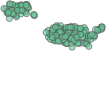

In [54]:
MultiPoint(pts)

## Class `ExtractAttribute`

In [55]:
class QuuxGenerator(CustomGenerator):
    aaa = Integer(0, 100)
    bbb = HashDigest(length=6)

In [56]:
g = QuuxGenerator()

Using `ExtractAttribute` we can produce \"derived\" generators which extract the attributes `aaa`, `bbb` from the elements produced by `g`.

In [57]:
h1 = ExtractAttribute(g, 'aaa')
h2 = ExtractAttribute(g, 'bbb')

In [58]:
g.reset(seed=99999); print_generated_sequence(g, num=5, sep='\n')

Generated sequence:
Quux(aaa=20, bbb='550617')
Quux(aaa=24, bbb='D461EC')
Quux(aaa=70, bbb='7221B5')
Quux(aaa=47, bbb='FB5E55')
Quux(aaa=92, bbb='539FF2')


In [59]:
h1.reset(seed=99999); print_generated_sequence(h1, num=5)
h2.reset(seed=99999); print_generated_sequence(h2, num=5)

Generated sequence: 20, 24, 70, 47, 92
Generated sequence: 550617, D461EC, 7221B5, FB5E55, 539FF2


## Class `IterateOver`

In [60]:
seq = ['aa', 'bb', 'cc', 'dd', 'ee']

In [61]:
g = IterateOver(seq)

In [62]:
g.reset(); print(list(g.generate(N=3)))
g.reset(); print(list(g.generate(N=10)))
g.reset(); print(list(g))

['aa', 'bb', 'cc']
['aa', 'bb', 'cc', 'dd', 'ee']
['aa', 'bb', 'cc', 'dd', 'ee']


## Using tohu generators as iterators

Each `tohu` generator can also be used as a Python iterator producing an (infinite) series of elements.

In [63]:
int_generator = Integer(low=100, high=500).reset(seed=99999)

for i, x in enumerate(int_generator):
    if i > 20:
        break
    print(x, end=" ")

161 258 356 432 478 221 281 311 203 229 307 470 410 410 367 203 130 455 270 370 296 

## `ItemList`

The `.generate()` method produces an `ItemList` instance.

In [64]:
g = HashDigest(length=6)

In [65]:
item_list = g.generate(N=10, seed=12345)
print(item_list)

<ItemList containing 10 items>


Fundamentally an `ItemList` behaves like a regular list.

In [66]:
print(list(item_list))

['924A90', '03AAD6', 'A3A0E2', '9AE4B9', '76E73D', '2F33A4', 'E79235', '8E89A6', '9E4CE4', 'CFC669']


In [67]:
item_list.reset(seed=999999)
print(list(item_list.subsample(num=6)))
print(list(item_list.subsample(num=6)))
print(list(item_list.subsample(num=6)))

['A3A0E2', '9AE4B9', '924A90', '9E4CE4', 'E79235', 'CFC669']
['CFC669', 'A3A0E2', '03AAD6', '8E89A6', '9AE4B9', '9E4CE4']
['2F33A4', 'A3A0E2', '03AAD6', '76E73D', 'CFC669', '924A90']


In [68]:
item_list.reset(seed=99999)
print(list(item_list.subsample(p=0.4)))
print(list(item_list.subsample(p=0.4)))
print(list(item_list.subsample(p=0.4)))

['924A90', '9AE4B9', '8E89A6', 'CFC669']
['924A90', '03AAD6', 'A3A0E2', '76E73D']
['924A90', '03AAD6', '9AE4B9', '76E73D', 'CFC669']
